# Problem Statement

## The objective of this project is to predict flight prices given the various parameters. Data used in this article is publicly available at Kaggle. This will be a regression problem since the target or dependent variable is the price (continuous numeric value).

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Loading Datasets

In [2]:
train=pd.read_excel('Data/Data_Train.xlsx')
test=pd.read_excel('Data/Test_set.xlsx')

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


## Profile Report

In [7]:
#profile_report=ProfileReport(train)

In [8]:
#profile_report.to_file('Profile_report.html')

In [9]:
#profile_report

## Data Audit

### Handling Missings

In [10]:
train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
train.dropna(inplace=True)

In [12]:
(test.isna().sum()/test.shape[0])*100

Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
dtype: float64

### Handling Duplicate Records

In [13]:
train.duplicated().sum()

220

In [14]:
train.drop_duplicates(inplace=True)

In [15]:
test.duplicated().sum()

26

In [16]:
test.drop_duplicates(inplace=True)

### Handling Date Time Features

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [18]:
#from Date_of_Journey feature we can extract Date_of_Journey_month and Date_of_Journey_day.
train['Journey_month']=pd.to_datetime(train.Date_of_Journey).dt.month
train['Journey_day']=pd.to_datetime(train.Date_of_Journey).dt.day

In [19]:
test['Journey_month']=pd.to_datetime(test.Date_of_Journey).dt.month
test['Journey_day']=pd.to_datetime(test.Date_of_Journey).dt.day

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
 11  Journey_month    10462 non-null  int64 
 12  Journey_day      10462 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [21]:
#from Dep_Time we can extract Dep_hour and Dep_min
train['Dept_hour']=pd.to_datetime(train.Dep_Time).dt.hour
train['Dept_min']=pd.to_datetime(train.Dep_Time).dt.minute

In [22]:
test['Dept_hour']=pd.to_datetime(test.Dep_Time).dt.hour
test['Dept_min']=pd.to_datetime(test.Dep_Time).dt.minute

In [23]:
#from Arrival_Time, we can extract Arrival_hour and Arrival_min
train['Arrival_hour']=pd.to_datetime(train.Arrival_Time).dt.hour
train['Arrival_min']=pd.to_datetime(train.Arrival_Time).dt.minute

In [24]:
test['Arrival_hour']=pd.to_datetime(test.Arrival_Time).dt.hour
test['Arrival_min']=pd.to_datetime(test.Arrival_Time).dt.minute

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
 11  Journey_month    10462 non-null  int64 
 12  Journey_day      10462 non-null  int64 
 13  Dept_hour        10462 non-null  int64 
 14  Dept_min         10462 non-null  int64 
 15  Arrival_hour     10462 non-null  int64 
 16  Arrival_min      10462 non-null  int64 
dtypes: int64(7), object(10)
memory 

In [26]:
#Converting 'Duration' into proper format
train.Duration.str.split()

0        [2h, 50m]
1        [7h, 25m]
2            [19h]
3        [5h, 25m]
4        [4h, 45m]
           ...    
10678    [2h, 30m]
10679    [2h, 35m]
10680         [3h]
10681    [2h, 40m]
10682    [8h, 20m]
Name: Duration, Length: 10462, dtype: object

In [27]:
def duration(x):
    x=x.split()
    hour=0
    minute=0
    if len(x)==1:
        if x[0][-1] in ['h','H']:
            minute=0
            hour=int(re.sub('[^0-9]','',x[0]))
        elif x[0][-1] in ['m','M']:
            hour=0
            minute=int(re.sub('[^0-9]','',x[0]))
    else:
        hour=int(re.sub('[^0-9]','',x[0]))
        minute=int(re.sub('[^0-9]','',x[1]))
    return hour,minute

In [28]:
train['Duration_hour']=test['Duration'].apply(lambda x : duration(x)[0])
train['Duration_minute']=test['Duration'].apply(lambda x : duration(x)[1])

In [29]:
test['Duration_hour']=train['Duration'].apply(lambda x : duration(x)[0])
test['Duration_minute']=train['Duration'].apply(lambda x : duration(x)[1])

In [30]:
train['Duration'].isna().sum()

0

In [31]:
train['Duration_hour'].isna().sum()

7832

In [32]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20,1,10,10.0,55.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,4.0,0.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25,23.0,45.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,13.0,0.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,2.0,50.0


In [33]:
#dropping unwanted features
train.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],inplace=True)

In [34]:
test.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time','Duration'],inplace=True)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10462 non-null  object 
 1   Source           10462 non-null  object 
 2   Destination      10462 non-null  object 
 3   Route            10462 non-null  object 
 4   Total_Stops      10462 non-null  object 
 5   Additional_Info  10462 non-null  object 
 6   Price            10462 non-null  int64  
 7   Journey_month    10462 non-null  int64  
 8   Journey_day      10462 non-null  int64  
 9   Dept_hour        10462 non-null  int64  
 10  Dept_min         10462 non-null  int64  
 11  Arrival_hour     10462 non-null  int64  
 12  Arrival_min      10462 non-null  int64  
 13  Duration_hour    2630 non-null   float64
 14  Duration_minute  2630 non-null   float64
dtypes: float64(2), int64(7), object(6)
memory usage: 1.5+ MB


### Handling Categorical Features

In [36]:
#Converting 'Total_Stops' into Numerical Feature
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [37]:
def total_stops(x):
    stop=re.sub('[^0-9]','',x)
    if stop=='':
        return 0
    else:
        return int(stop)

In [38]:
train['Total_Stops']=train['Total_Stops'].apply(lambda x : total_stops(x))

In [39]:
test['Total_Stops']=test['Total_Stops'].apply(lambda x : total_stops(x))

In [40]:
train['Total_Stops'].value_counts()

1    5625
0    3475
2    1318
3      43
4       1
Name: Total_Stops, dtype: int64

In [41]:
#checking into feature 'Additional_Info'
train['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [42]:
#handling repetition of 'No info' class
train['Additional_Info'][train['Additional_Info']=='No Info']='No info'

In [43]:
test['Additional_Info'].value_counts()

No info                         2126
In-flight meal not included      440
No check-in baggage included      76
1 Long layover                     1
Change airports                    1
Business class                     1
Name: Additional_Info, dtype: int64

In [44]:
#Encoding features ['Airline', 'Source', 'Destination','Additional_Info']

In [45]:
dummies_train=pd.get_dummies(train[['Airline', 'Source', 'Destination','Additional_Info']])

In [46]:
dummies_test=pd.get_dummies(test[['Airline', 'Source', 'Destination','Additional_Info']])

### Final Dataframe

In [47]:
#Concatinating Dataframes
train=pd.concat([train,dummies_train],axis=1)

In [48]:
test=pd.concat([test,dummies_test],axis=1)

In [49]:
#Dropping unwanted features
train.drop(columns=['Airline', 'Source', 'Destination','Additional_Info','Route'],inplace=True)

In [50]:
test.drop(columns=['Airline', 'Source', 'Destination','Additional_Info','Route'],inplace=True)

In [51]:
train.head()

,Total_Stops,Price,Journey_month,Journey_day,Dept_hour,Dept_min,Arrival_hour,Arrival_min,Duration_hour,Duration_minute,...,Destination_New Delhi,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,3,24,22,20,1,10,10.0,55.0,...,1,0,0,0,0,0,0,0,1,0
1,2,7662,1,5,5,50,13,15,4.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,9,25,4,25,23.0,45.0,...,0,0,0,0,0,0,0,0,1,0
3,1,6218,12,5,18,5,23,30,13.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,16,50,21,35,2.0,50.0,...,1,0,0,0,0,0,0,0,1,0


### Train Test Split

In [52]:
X_train=train.drop(columns=['Price','Duration_hour','Duration_minute'])

In [53]:
test=test.drop(columns=['Duration_hour','Duration_minute'])

In [54]:
Y_train=train['Price'].copy()

In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.3,random_state=101)

## Model Building

### KNN

In [56]:
knn=KNeighborsRegressor()

In [57]:
Knn=knn.fit(X_train,Y_train)

In [58]:
knn_predict=knn.predict(X_train)

In [59]:
r2_score(Y_train,knn_predict)

0.6769823991938926

### Random Forest 

In [60]:
rf=RandomForestRegressor()

In [61]:
rf=rf.fit(X_train,Y_train)

In [62]:
rf_predict=rf.predict(X_train)

In [63]:
print('Training Accuracy : ',r2_score(Y_train,rf_predict))

Training Accuracy :  0.9821260338080376


In [64]:
print('Testing Accuracy : ',r2_score(Y_test,rf.predict(X_test)))

Testing Accuracy :  0.8910664085864445


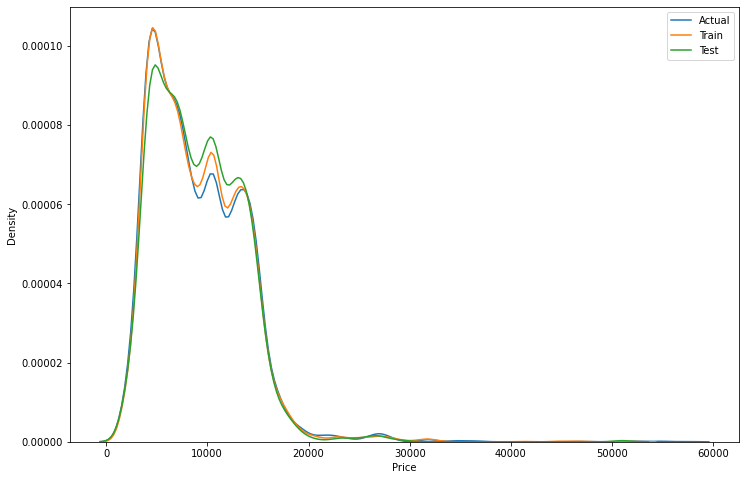

In [65]:
plt.figure(figsize=(12,8))
sns.kdeplot(Y_train)
sns.kdeplot(rf_predict)
sns.kdeplot(rf.predict(X_test))
plt.legend(['Actual',"Train",'Test'])
plt.show()